### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.options.mode.copy_on_write = True


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.
2. Keeping a copy of the original file









In [286]:
data = pd.read_csv('data/coupons.csv')
orig_data = data.copy()

In [287]:
# Checking the observation size and sample data
print(data.shape)
print(data.head())

(12684, 26)
       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~

In [288]:
# Checking to see the column information including data type
# This will give idea if any data type needs to be changed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [289]:
#Check the stats to see if there is any outliers or any odd data
stats = data.describe(include='all')
print(stats)

            destination passanger weather   temperature   time        coupon  \
count             12684     12684   12684  12684.000000  12684         12684   
unique                3         4       3           NaN      5             5   
top     No Urgent Place     Alone   Sunny           NaN    6PM  Coffee House   
freq               6283      7305   10069           NaN   3230          3996   
mean                NaN       NaN     NaN     63.301798    NaN           NaN   
std                 NaN       NaN     NaN     19.154486    NaN           NaN   
min                 NaN       NaN     NaN     30.000000    NaN           NaN   
25%                 NaN       NaN     NaN     55.000000    NaN           NaN   
50%                 NaN       NaN     NaN     80.000000    NaN           NaN   
75%                 NaN       NaN     NaN     80.000000    NaN           NaN   
max                 NaN       NaN     NaN     80.000000    NaN           NaN   

       expiration  gender    age    mar

In [290]:
# Check for missing values in percentage to get a better idea
data.isna().mean().round(2).multiply(100)

,0
destination,0.0
passanger,0.0
weather,0.0
temperature,0.0
time,0.0
coupon,0.0
expiration,0.0
gender,0.0
age,0.0
maritalStatus,0.0


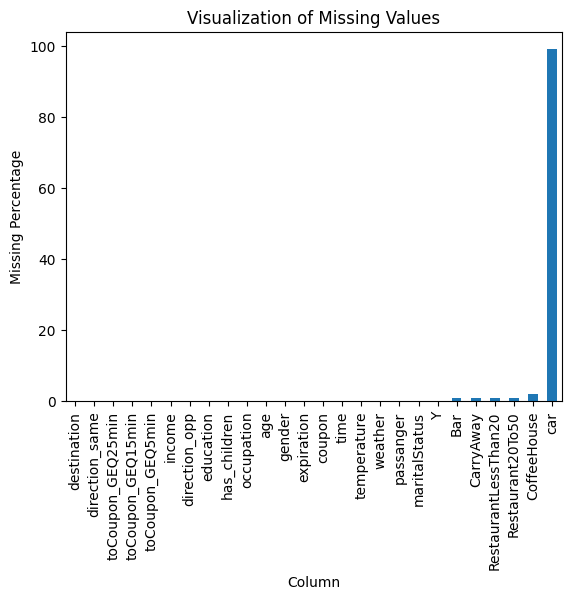

In [291]:
# visualizing the missing values
# plt.figure(figsize=(10, 8))
data.isna().mean().round(2).multiply(100).sort_values().plot(kind = "bar");
plt.title('Visualization of Missing Values')
plt.xlabel('Column')
plt.ylabel('Missing Percentage');
plt.savefig("images/MissingValuesBarPlot.png",bbox_inches = 'tight')
plt.show()

In [292]:
# Fins number of duplicates
data.duplicated().sum()

74

3. Decide what to do about your missing data -- drop, replace, other...

In [293]:
# Data seems to be clean. The categorical values are consistent.
# Column car has missing values but does not impact any analysis. so, can be excluded from any analysis
# Some duplicate rows are present. But since it is the survey data, duplicates data can be possible.
# Again the duplicates are so minimal that removing or keeping will not make much difference

# use fillNa to change NaN values to never for columns Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
data["Bar"] = data["Bar"].fillna("never")
data["CoffeeHouse"] = data["CoffeeHouse"].fillna("never")
data["CarryAway"] = data["CarryAway"].fillna("never")
data["RestaurantLessThan20"] = data["RestaurantLessThan20"].fillna("never")
data["Restaurant20To50"] = data["Restaurant20To50"].fillna("never")

# car column has mostly null, Filling the NaN with None
data["car"] = data["car"].fillna("None")

4. What proportion of the total observations chose to accept the coupon?



In [294]:
# Checking the values in the column to get an idea about the data
data['Y'].value_counts()

,count
Y,
1,7210
0,5474


In [295]:
# Since column Y has value 1/0, sum() gives the number of acceptance
# Displaying proportion in 2 decimal
coupon_accepted  = data['Y'].sum()
total_observation = len(data)
proportion_accepted = coupon_accepted / total_observation
print("Proportion of Accepted Coupons:", proportion_accepted.round(2))


Proportion of Accepted Coupons: 0.57


5. Use a bar plot to visualize the `coupon` column.

In [296]:
# Checking the values for column coupon before plotting
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

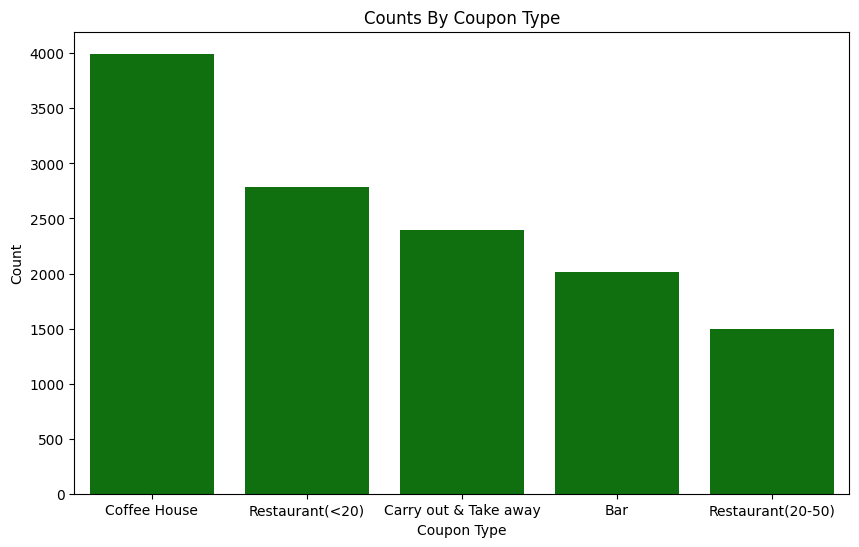

In [297]:
# Using sns barplot to create a bar plot with adding title, labels, and other features
coupon_count_by_type = data['coupon'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=coupon_count_by_type.index, y=coupon_count_by_type.values, color='green')
plt.title('Counts By Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count');
plt.savefig("images/CouponCountByType.png")


6. Use a histogram to visualize the temperature column.

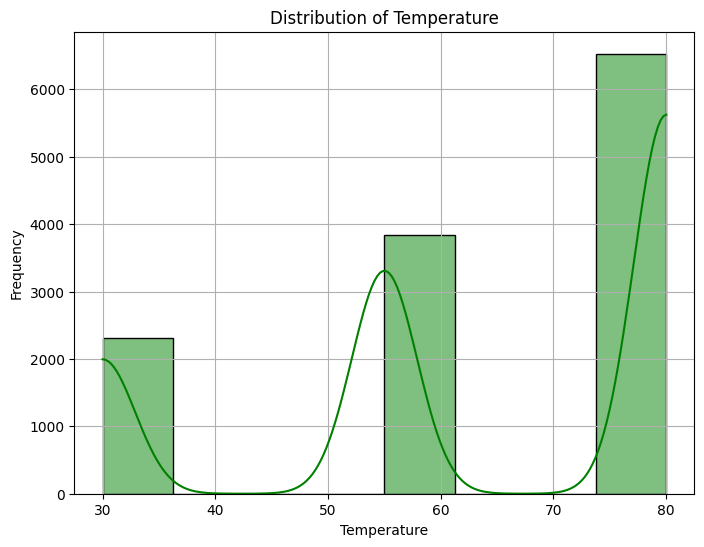

In [298]:
# Using sns histplot to create a histogram with adding title, labels, and other features
plt.figure(figsize=(8, 6))
sns.histplot(data['temperature'], bins=8, kde = True, color='green')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("images/TemperatureDistribution.png")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [299]:
bar_data = data.query('coupon == "Bar"')
# print(bar_data)

2. What proportion of bar coupons were accepted?


In [300]:
#Checking to see the count of unique values
bar_data['Y'].value_counts()

,count
Y,
0,1190
1,827


In [301]:
# to find the proportion checking the count of accepted coupon to the total observation
bar_coupon_accepted  = bar_data['Y'].sum()
total_bar_observation = len(bar_data)
proportion_bar_coupon_accepted = bar_coupon_accepted / total_bar_observation
print("Proportion of Accepted Bar Coupons:", proportion_bar_coupon_accepted.round(2))

Proportion of Accepted Bar Coupons: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [302]:
# Checking the unique values for column Bar
bar_data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [303]:
# Creating a lists for values which should be for three_or_less and more_than_three which can be used in comparision
# Created a function to categorized each row in to either three_or_less or more_than_three
three_or_less = ["never", "less1","1~3"];
more_than_three = ["4~8","gt8"];
#print(three_or_less)
#print(more_than_three)
bar_data['bar_visit_cat'] = bar_data['Bar'].apply(lambda x: '3 or Less' if x in three_or_less else 'More than 3')
bar_data['bar_visit_cat'].unique()


array(['3 or Less', 'More than 3'], dtype=object)

In [304]:
# now checking the acceptance_rate by taking the mean in each category
acceptance_rate = bar_data.groupby('bar_visit_cat')['Y'].mean().reset_index()
acceptance_rate.rename(columns={'Y': 'acceptance_rate'}, inplace=True)


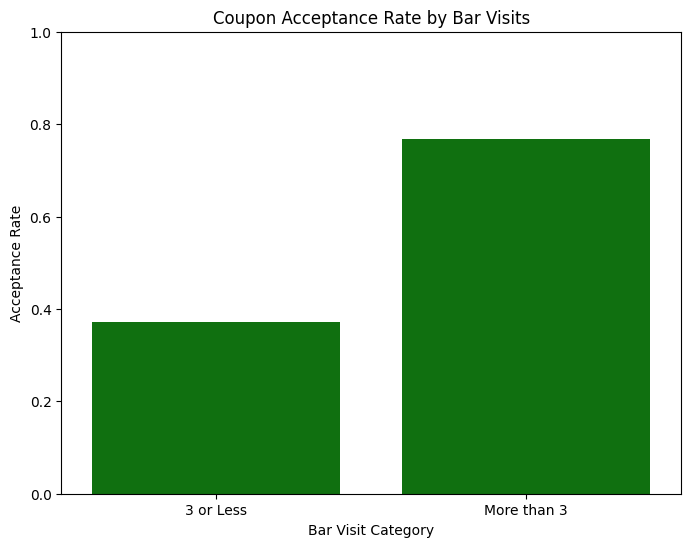

  bar_visit_cat  acceptance_rate
0     3 or Less         0.370737
1   More than 3         0.768844


In [305]:
# Visualize the acceptance rates with a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='bar_visit_cat', y='acceptance_rate', data=acceptance_rate, color='green')
plt.title('Coupon Acceptance Rate by Bar Visits')
plt.xlabel('Bar Visit Category')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # set y-axis limits from 0 to 1 for rate clarity
plt.savefig("images/CouponAccpRateByBarVisits.png")
plt.show()
print(acceptance_rate)

# Conclusion: People who went more than 3 times in a month has higher acceptance rate than people who went less than 3 times

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


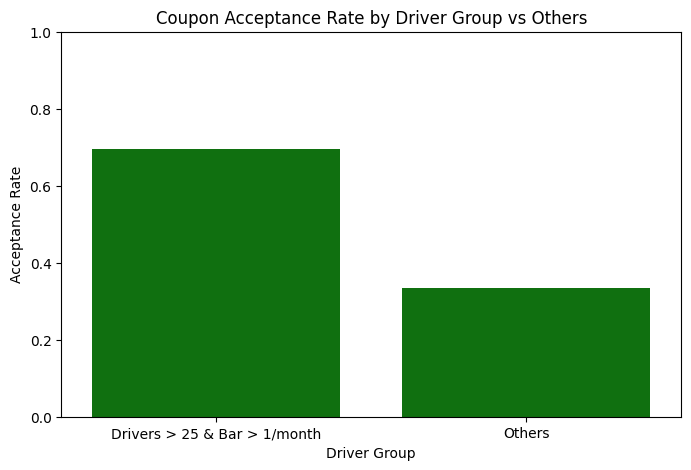

                   driver_group  acceptance_rate
0  Drivers > 25 & Bar > 1/month         0.695238
1                        Others         0.335003


In [306]:
# Create a new column to categorize the groups
more_than_once = ["1~3","4~8","gt8"];
age_more_than_25 = ["46","26","31","41","50plus","36"]
bar_data['driver_group'] = bar_data.apply(
    lambda x: 'Drivers > 25 & Bar > 1/month' if (x['Bar'] in more_than_once and x['age'] in age_more_than_25) else 'Others',
    axis=1
)

# Calculate acceptance rate for each group
acceptance_rate = bar_data.groupby('driver_group')['Y'].mean().reset_index()

# Rename the acceptance rate column for clarity
acceptance_rate.rename(columns={'Y': 'acceptance_rate'}, inplace=True)

# Visualize the acceptance rate with a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='driver_group', y='acceptance_rate', data=acceptance_rate, color='green')
plt.title('Coupon Acceptance Rate by Driver Group vs Others')
plt.xlabel('Driver Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for rate clarity
plt.savefig("images/CouponAccpRateDGVsOthers.png")
plt.show()

# Display the acceptance rates for each group
print(acceptance_rate)

# Conclusion: People who went to Bar more than once in a month and are age > 25 has higher acceptance rate than people who went less than once or less than 25

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


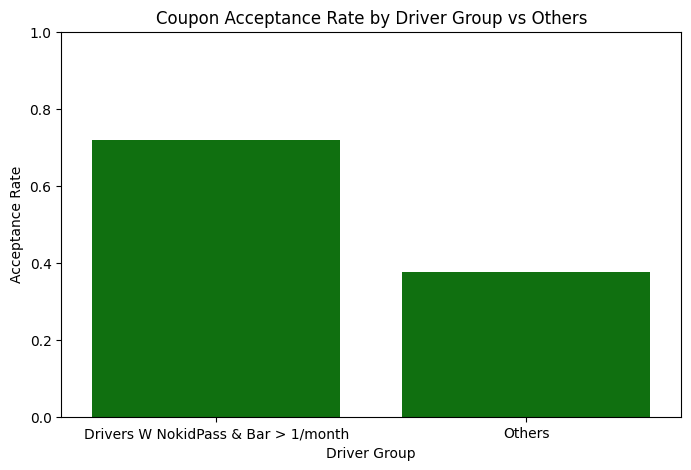

                        driver_group_2  acceptance_rate
0  Drivers W NokidPass & Bar > 1/month         0.717949
1                               Others         0.377058


In [307]:
# Create a new column to categorize the groups
more_than_once = ["1~3","4~8","gt8"];
passanger_not_kid = ["Friend(s)","Partner"]
occupation = ["Farming Fishing & Forestry"]
bar_data['driver_group_2'] = bar_data.apply(
    lambda x: 'Drivers W NokidPass & Bar > 1/month' if (x['Bar'] in more_than_once and x['passanger'] in passanger_not_kid and x['occupation'] not in occupation) else 'Others',
    axis=1
)

# Calculate acceptance rate for each group
acceptance_rate = bar_data.groupby('driver_group_2')['Y'].mean().reset_index()

# Rename the acceptance rate column for clarity
acceptance_rate.rename(columns={'Y': 'acceptance_rate'}, inplace=True)

# Visualize the acceptance rate with a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='driver_group_2', y='acceptance_rate', data=acceptance_rate, color='green')
plt.title('Coupon Acceptance Rate by Driver Group vs Others')
plt.xlabel('Driver Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for rate clarity
plt.savefig("images/CouponAccpRateDG2VsOthers.png")
plt.show()

# Display the acceptance rates for each group
print(acceptance_rate)
# Conclusion: People who went to Bar more than once in a month, have no kids passenger in car and occupation
# other than farming, fishing, or forestry has higher acceptance rate than other people

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



driver_group_cat
Others                                 5408
Bar > 1, No Kids, Not Widowed          3696
Cheap Restaurants > 4, Income < 50K    3540
Bar > 1, Age < 30                        40
Name: count, dtype: int64
                          Driver Group  Acceptance Rate
0                    Bar > 1, Age < 30         0.725000
1        Bar > 1, No Kids, Not Widowed         0.623106
2  Cheap Restaurants > 4, Income < 50K         0.557345
3                               Others         0.537167


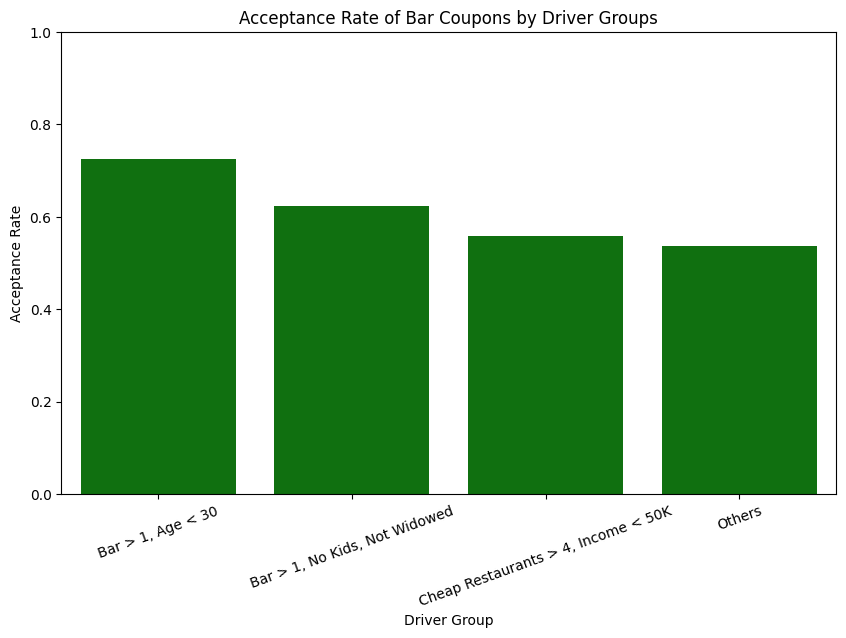

In [308]:
data['driver_group_cat'] = data.apply(lambda x: 'Bar > 1, No Kids, Not Widowed' if (
   # x['car'] not in ["None","do not drive"] and
    x['Bar']in ["1~3","4~8","gt8"] and
    x['passanger'] != 'Kid(s)' and
    x['maritalStatus'] != 'Widowed'
) else (
    'Bar > 1, Age < 30' if (
     #   x['car'] not in ["None","do not drive"] and
        x['Bar']in ["1~3","4~8","gt8"] and
        x['age'] in ["below21","21","26"]
    ) else (
        'Cheap Restaurants > 4, Income < 50K' if (
      #      x['car'] not in ["None","do not drive"] and
            x['RestaurantLessThan20'] in ["1~3","4~8","gt8"] and
            x['income'] in ["Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999"]
        ) else 'Others'
    )
), axis=1)
print(data['driver_group_cat'].value_counts())
acceptance_rate = data.groupby('driver_group_cat')['Y'].mean().reset_index()
acceptance_rate.columns = ['Driver Group', 'Acceptance Rate']
print(acceptance_rate)
plt.figure(figsize=(10, 6))
sns.barplot(x='Driver Group', y='Acceptance Rate', data=acceptance_rate, color='green')
plt.title('Acceptance Rate of Bar Coupons by Driver Groups')
plt.xlabel('Driver Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.savefig("images/CouponAccpRateDGroupsVsOthers.png",bbox_inches = 'tight')
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [309]:
# Observations:
# Drivers who visit Bar more than 3 times have more acceptance rate than who visits less than 3 times
# Younger drivers under the age of 25/30 has good acceptance to the bar coupons.
# Again, if there are no kids passengers and occupations other than farming, fishing, or forestry also have better acceptance rate
# It is also observed that drivers with  with lower income who goes to cheap restaurant more often also have comparable accetance rate



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  